# Modelling

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics as met
from sklearn.metrics import mean_squared_error, mean_absolute_error

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
data0=pd.read_excel('raw.xlsx')

In [3]:
data = data0.copy()
data.set_index('Tarih', inplace=True)
print(data)

                KKH
Tarih              
5.1.2018  -0.739984
12.1.2018 -0.748211
19.1.2018 -0.731254
26.1.2018 -0.721848
2.2.2018  -0.667951
...             ...
25.8.2023  3.092377
1.9.2023   3.443602
8.9.2023   3.128496
15.9.2023  3.240233
22.9.2023  3.195168

[299 rows x 1 columns]


In [4]:
x1=data['KKH']

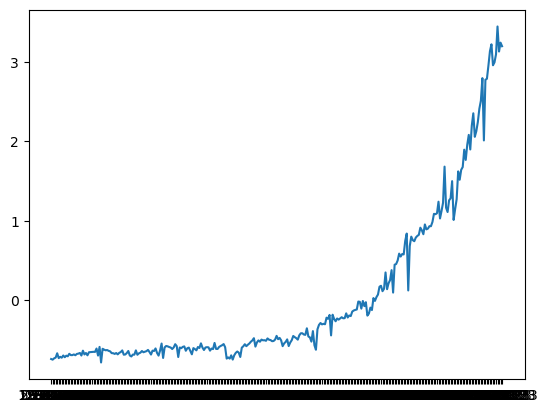

In [5]:
plt.plot(x1)

## Taking Lags of Series

In [6]:
print(f'Data Shape: {x1.shape}')
Y_X_1=sm.tsa.tsatools.add_lag(x1, col=None, lags=1, drop=False, insert=True)
print(f'Shape of Lag-1. First column is level and others are lags: {Y_X_1.shape}')
Y_X_2=sm.tsa.tsatools.add_lag(x1, col=None, lags=2, drop=False, insert=True)
print(f'Shape of Lag-2. First column is level and others are lags: {Y_X_2.shape}')
Y_X_3=sm.tsa.tsatools.add_lag(x1, col=None, lags=3, drop=False, insert=True)
print(f'Shape of Lag-3. First column is level and others are lags: {Y_X_3.shape}')
Y_X_4=sm.tsa.tsatools.add_lag(x1, col=None, lags=4, drop=False, insert=True)
print(f'Shape of Lag-4. First column is level and others are lags: {Y_X_4.shape}')
Y_X_5=sm.tsa.tsatools.add_lag(x1, col=None, lags=5, drop=False, insert=True)
print(f'Shape of Lag-5. First column is level and others are lags: {Y_X_5.shape}')
Y_X_6=sm.tsa.tsatools.add_lag(x1, col=None, lags=6, drop=False, insert=True)
print(f'Shape of Lag-6. First column is level and others are lags: {Y_X_6.shape}')

Data Shape: (299,)
Shape of Lag-1. First column is level and others are lags: (298, 2)
Shape of Lag-2. First column is level and others are lags: (297, 3)
Shape of Lag-3. First column is level and others are lags: (296, 4)
Shape of Lag-4. First column is level and others are lags: (295, 5)
Shape of Lag-5. First column is level and others are lags: (294, 6)
Shape of Lag-6. First column is level and others are lags: (293, 7)


## Support Vector Machine( Support Vector Regression)

### Selecting Test Size

In [7]:
test_size=np.int_(np.round(len(x1)*0.2))
print(f'Test Size: {test_size}')

Test Size: 60


In [8]:
def make_rbf(Inputs,test_size):
    print(f'input shape {Inputs.shape}')
    parameters={'C': [0.001,0.05,0.1, 5,50, 100, 500],
           'gamma':[0.0001,0.001,0.005,0.01,0.01,1 ],
           'epsilon':[0.001,0.005,0.01,0.05,0.1,1]}
    svr_rbf = svm.SVR(kernel="rbf")
    rbf = GridSearchCV(svr_rbf, parameters)
    X_train=Inputs[:-test_size,1:]
    print(f'X_train shape {X_train.shape}')
    Y_train=Inputs[:-test_size,0:1]
    print(f'Y_train shape {Y_train.shape}')
    rbf.fit(X_train,Y_train) # rbf.fit(X,y)
    X_test=Inputs[-test_size:,1:]
    print(f'X_test Shape: {X_test.shape}')
    Y_test=Inputs[-test_size:,0:1]
    print(f'Y_test Shape: {Y_test.shape}')
    SVM_forecast=rbf.predict(X_test)
    print(f'Predicted Array Shape: {SVM_forecast.shape}')
    SVM_forecast=SVM_forecast.reshape(len(SVM_forecast),1)
    print("best parameters: ",rbf.best_params_)
    print("Test MAE :",mean_absolute_error(Y_test, SVM_forecast))
    print("Test MSE : ", mean_squared_error(Y_test,SVM_forecast))
    print("Test RMSE : ", np.sqrt(mean_squared_error(Y_test,SVM_forecast)))
    #print("Test R^2 : ", r2_score(Y_test,SVM_forecast))
    #print(f'Adjusted R^2 (Train): {1-((1-rbf.best_score_)*(len(Y_train)-1)/(len(Y_train)-Y_train.shape[1]-1))}')

In [9]:
make_rbf(Y_X_1,test_size)

input shape (298, 2)
X_train shape (238, 1)
Y_train shape (238, 1)
X_test Shape: (60, 1)
Y_test Shape: (60, 1)
Predicted Array Shape: (60,)
best parameters:  {'C': 500, 'epsilon': 0.001, 'gamma': 0.01}
Test MAE : 0.20496845951272816
Test MSE :  0.09127847208350463
Test RMSE :  0.30212327299217556


In [10]:
make_rbf(Y_X_2,test_size)

input shape (297, 3)
X_train shape (237, 2)
Y_train shape (237, 1)
X_test Shape: (60, 2)
Y_test Shape: (60, 1)
Predicted Array Shape: (60,)
best parameters:  {'C': 500, 'epsilon': 0.05, 'gamma': 0.01}
Test MAE : 0.14713000198949644
Test MSE :  0.04181132146691086
Test RMSE :  0.20447816868045074


In [11]:
make_rbf(Y_X_3,test_size)

input shape (296, 4)
X_train shape (236, 3)
Y_train shape (236, 1)
X_test Shape: (60, 3)
Y_test Shape: (60, 1)
Predicted Array Shape: (60,)
best parameters:  {'C': 100, 'epsilon': 0.05, 'gamma': 0.01}
Test MAE : 0.16599165661640208
Test MSE :  0.04696540143317345
Test RMSE :  0.21671502355206815


In [12]:
make_rbf(Y_X_4,test_size)

input shape (295, 5)
X_train shape (235, 4)
Y_train shape (235, 1)
X_test Shape: (60, 4)
Y_test Shape: (60, 1)
Predicted Array Shape: (60,)
best parameters:  {'C': 50, 'epsilon': 0.001, 'gamma': 0.001}
Test MAE : 0.14070650385957265
Test MSE :  0.03433261828461684
Test RMSE :  0.18529063193970935


In [13]:
make_rbf(Y_X_5,test_size)

input shape (294, 6)
X_train shape (234, 5)
Y_train shape (234, 1)
X_test Shape: (60, 5)
Y_test Shape: (60, 1)
Predicted Array Shape: (60,)
best parameters:  {'C': 50, 'epsilon': 0.05, 'gamma': 0.01}
Test MAE : 0.25969090474977125
Test MSE :  0.12659004558051412
Test RMSE :  0.3557949487844285


In [14]:
make_rbf(Y_X_6,test_size)

input shape (293, 7)
X_train shape (233, 6)
Y_train shape (233, 1)
X_test Shape: (60, 6)
Y_test Shape: (60, 1)
Predicted Array Shape: (60,)
best parameters:  {'C': 50, 'epsilon': 0.05, 'gamma': 0.01}
Test MAE : 0.2930705817282863
Test MSE :  0.17340243162316754
Test RMSE :  0.4164161759864373


X_test Shape: (295, 1)
X_test Shape: (295, 4)
X_test Shape: (60, 4)
Y_test Shape: (60, 1)
train data shape: (235, 4)
train1 data shape: (235, 1)
(295, 5)
Predicted Array Shape: (60, 1)
Test RMSE :  0.18529063193970935
Test MAE of SVR : 0.14070650385957265
Test MSE of SVR :  0.03433261828461684
Test RMSE of SVR :  0.18529063193970935
predicted data shape: (235, 1)
Train MAE of SVR : 0.04303944896062733
Train MSE of SVR :  0.005243459205746151
Train RMSE of SVR :  0.07241173389545476
(295, 1)
(295,)


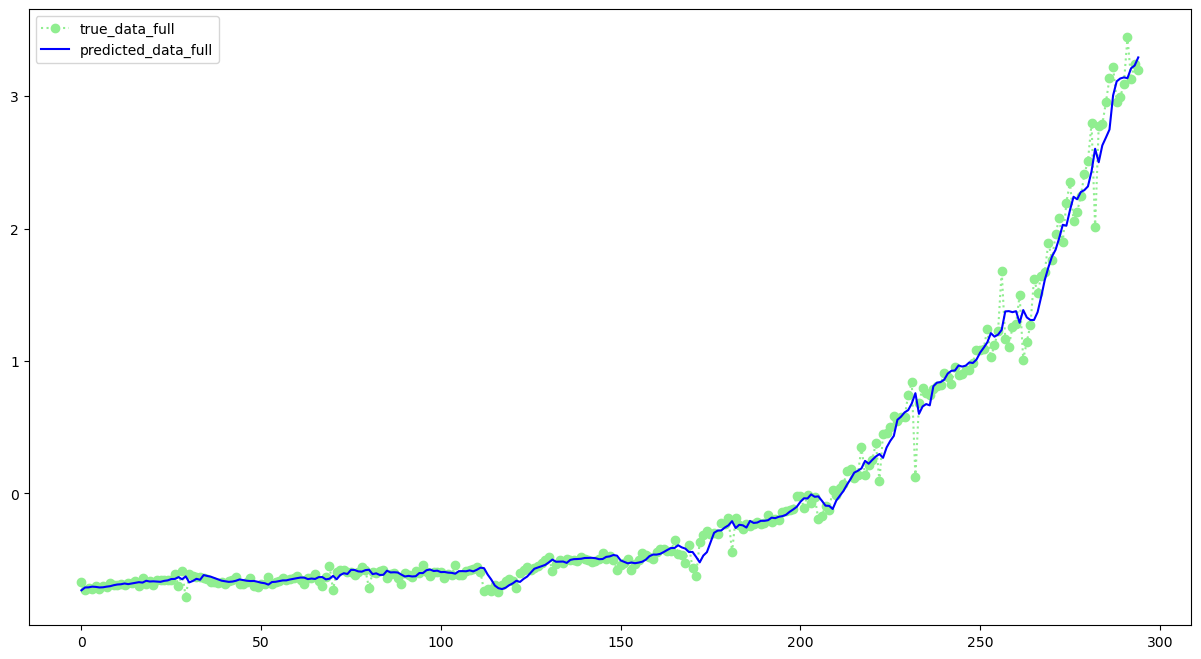

In [15]:
full_true=Y_X_4[:,0:1]
print(f'X_test Shape: {full_true.shape}')
full_true_test=Y_X_4[:,1:]
print(f'X_test Shape: {full_true_test.shape}')
X_test=Y_X_4[-test_size:,1:]
print(f'X_test Shape: {X_test.shape}')
Y_test=Y_X_4[-test_size:,0:1]
print(f'Y_test Shape: {Y_test.shape}')
X_train=Y_X_4[:-test_size,1:]
print(f'train data shape: {X_train.shape}')
Y_train=Y_X_4[:-test_size,0:1]
print(f'train1 data shape: {Y_train.shape}')
print(Y_X_4.shape)
svr_rbf = svm.SVR(kernel="rbf", C=50, gamma=0.001, epsilon=0.001)
svr_rbf.fit(X_train,Y_train) # rbf.fit(X,y)
SVM_forecast=svr_rbf.predict(X_test)
SVM_forecast=SVM_forecast.reshape(len(SVM_forecast),1)
print(f'Predicted Array Shape: {SVM_forecast.shape}')
print("Test RMSE : ", np.sqrt(mean_squared_error(Y_test,SVM_forecast)))
print("Test MAE of SVR :",mean_absolute_error(Y_test, SVM_forecast))
print("Test MSE of SVR : ", mean_squared_error(Y_test, SVM_forecast))
print("Test RMSE of SVR : ", np.sqrt(mean_squared_error(Y_test, SVM_forecast)))
train_forecast=svr_rbf.predict(X_train)
train_forecast=train_forecast.reshape(len(train_forecast),1)
print(f'predicted data shape: {train_forecast.shape}')
print("Train MAE of SVR :",mean_absolute_error(Y_train, train_forecast))
print("Train MSE of SVR : ", mean_squared_error(Y_train, train_forecast))
print("Train RMSE of SVR : ", np.sqrt(mean_squared_error(Y_train, train_forecast)))
full_rbf_forecast=svr_rbf.predict(full_true_test)
print(full_true.shape)
print(full_rbf_forecast.shape)
fig,ax=plt.subplots(figsize=(15,8))
plt.plot(full_true, label='true_data_full',linestyle=':',color='lightgreen', marker='o')
plt.plot(full_rbf_forecast, label='predicted_data_full', color='blue')
plt.legend()

## Forecasting

In [16]:
Y_X_4

array([[-0.66795136, -0.72184786, -0.73125386, -0.74821079, -0.73998369],
       [-0.72863097, -0.66795136, -0.72184786, -0.73125386, -0.74821079],
       [-0.71244435, -0.72863097, -0.66795136, -0.72184786, -0.73125386],
       ...,
       [ 3.128496  ,  3.44360216,  3.09237695,  2.9917756 ,  2.9556478 ],
       [ 3.24023258,  3.128496  ,  3.44360216,  3.09237695,  2.9917756 ],
       [ 3.1951677 ,  3.24023258,  3.128496  ,  3.44360216,  3.09237695]])

In [17]:
X=Y_X_4[-1,0:4].reshape(1,-1)

In [18]:
X

array([[3.1951677 , 3.24023258, 3.128496  , 3.44360216]])

In [19]:
one_step_forecast=svr_rbf.predict(X)

In [20]:
one_step_forecast

array([3.305477])

In [21]:
(one_step_forecast*42503913.67381021)+44730595.01839465

array([1.85226304e+08])

##### Mustafa KARAKUZU